<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/seaborn_countplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###countplot

###countplot 실습에 사용할 데이터
- titanic
  - survived(int64)
  - pclass(int64)
  - sex(object)
  - age(float64)
  - sibsp(int64)
  - parch(int64)
  - fare(float64)
  - embarked(object)
  - class(category)
  - who(object)
  - adult_male(bool)
  - deck(category)
  - embark_town(object)
  - alive(object)
  - alone(bool)

####titanic
- 막대를 사용하여 각 범주형 빈의 관측치 개수를 표시합니다.

In [3]:
#데이터 로드하기
titanic = sns.load_dataset('titanic')

In [4]:
#데이터 미리보기
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#데이터 정보 요약
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
#데이터의 수치적 요약
titanic.describe(include=np.number)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#데이터의 범주적 요약
titanic.describe(include=['object','category'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


###그래프 확인

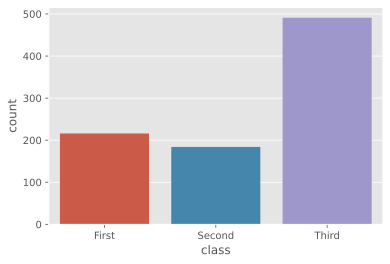

In [8]:
sns.countplot(data=titanic, x='class')

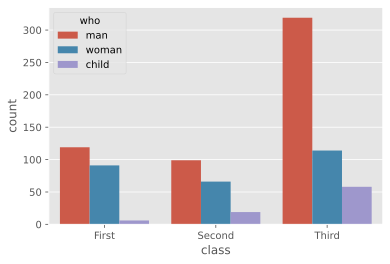

In [10]:
sns.countplot(x='class', data=titanic, hue='who')

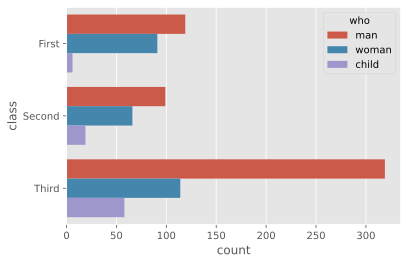

In [11]:
sns.countplot(y='class', hue='who', data=titanic)

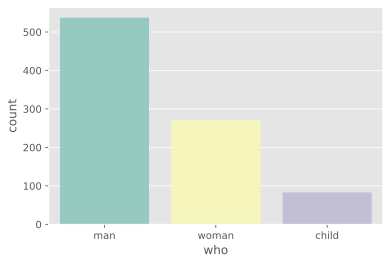

In [12]:
#palette 옵션 사용
sns.countplot(x='who', data=titanic, palette='Set3')

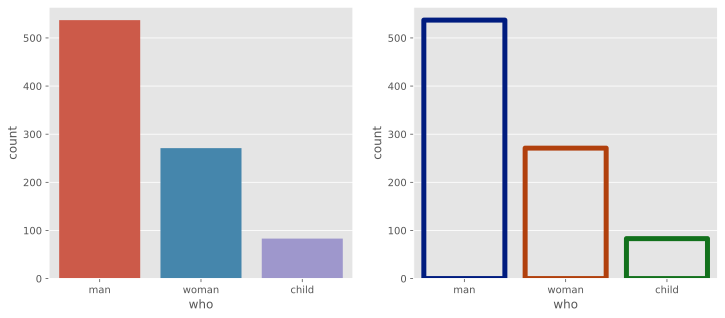

In [17]:
#matplotlib().axes.Axes.bar() 파라미터를 제어
f, ax= plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='who', data=titanic,ax=ax[0])
sns.countplot(x='who', data=titanic, ax=ax[1], facecolor=(0,0,0,0), linewidth=5, edgecolor=sns.color_palette('dark',3))

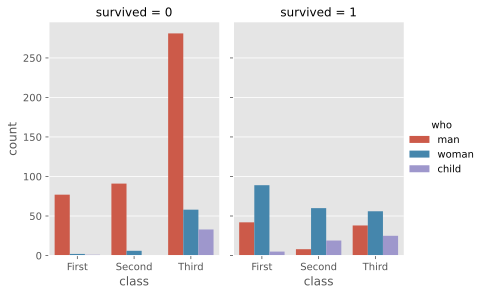

In [18]:
#catplot으로 countplot 그리기

sns.catplot(x='class', hue='who', col='survived', data=titanic, kind='count',height=4, aspect=.7)